# Data Preprocessing

This part is to check for missing values and the type of each column

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# import data
NCDB = pd.read_csv("/content/drive/My Drive/NCDB_2014.csv")
#NCDB = pd.read_csv("NCDB_2014.csv")
df = NCDB.copy()
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2014,1,1,10,2,1,02,03,1,3,2,18,1,01,UUUU,01,M,75,11,2,NN,1
1,2014,1,1,12,2,1,04,UU,1,5,1,UU,1,01,UUUU,01,F,21,11,2,02,1
2,2014,1,1,00,2,1,03,UU,7,3,1,UU,1,01,UUUU,01,F,34,11,2,02,1
3,2014,1,1,17,2,2,21,UU,1,1,1,18,1,01,UUUU,01,F,50,11,2,02,1
4,2014,1,1,17,2,2,21,UU,1,1,1,18,2,01,UUUU,01,M,63,11,1,NN,1


In [ ]:
# replace unrelated strings with nan in order to easily drop
import numpy as np
droplist = ["U","X","UU","XX","NN","NNNN","UUUU","XXXX","N"]
for value in droplist:
  df.replace(value, np.nan,inplace=True)

In [ ]:
# check for new data
df.head()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

In [ ]:
# check for each column
df.C_YEAR.unique()
# have only one value, can drop

df.C_MNTH.unique()
# [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, '12']
# '12' and 12 are different because of data type
df.C_MNTH = df.C_MNTH.astype(str)
df.C_MNTH.unique()

df.C_WDAY.unique()
#[1, 2, 3, 4, 5, 6, 7, '6', '7']
df.C_WDAY = df.C_WDAY.astype(str)
df.C_WDAY.unique()

#df.C_HOUR.unique()
#df.C_SEV.unique()

df.C_VEHS.unique()
#[1, 2, 3, 4, 6, 5, 9, 11, 51, 10, 7, 22, 21, 14, 13, 15, 57, 8, 17, 43, 20, 36, 37, 18, 12, 16, '02', '01', '04', '03', '05', '06','07', '09', 26]
df.C_VEHS = pd.to_numeric(df.C_VEHS)
for i in range(len(df.C_VEHS)):
  if df.C_VEHS[i] > 4:
    df.C_VEHS[i] = 4
df.C_VEHS = df.C_VEHS.astype(str)

#df.C_CONF.unique()
#df.C_RCFG.unique()
#df.C_WTHR.unique()
#df.C_RSUR.unique()
#df.C_RALN.unique()
#df.C_TRAF.unique()

#df.V_ID.unique()
#df.V_ID = pd.to_numeric(df.V_ID).astype(str)
#df.V_ID.unique()
# unique number to identify vehicle, can drop
#df.V_TYPE.unique()

#df.V_YEAR.unique()
#df.V_YEAR = pd.to_numeric(df.V_YEAR)
#df.V_YEAR.unique()
#df.P_ID.unique()
# unique number to indenty person, can drop
#df.P_SEX.unique()

df.P_AGE.unique()
df.P_AGE = pd.to_numeric(df.P_AGE)
df.P_AGE.unique()

#df.P_PSN.unique()
#df.P_ISEV.unique()
#df.P_SAFE.unique()
#df.P_USER.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([19, 22, 33, 37, 35, 56, 58, 30, 25, 54, 31, 36, 48, 24, 39,  2, 40,
       27, 41, 16, 20, 51, 43, 38, 34, 23, 49, 28, 50, 74, 52, 57, 61, 84,
       66,  4, 32, 68, 26, 21, 59, 46, 42, 72, 44,  1, 63,  7, 71, 65, 55,
       83, 29, 45, 69, 62,  8, 47,  9, 53, 17, 18, 14, 82, 80, 64, 78, 77,
       87, 15, 75, 88, 10, 13, 67, 12, 73, 70, 81, 60, 79, 76,  6, 11,  3,
        5, 89, 86, 85, 96, 90, 93, 92, 91, 94, 99, 97, 98, 95])

In [ ]:
# processing y
df.P_ISEV = pd.to_numeric(df.P_ISEV)

for i in range(len(df.P_ISEV)):
  if df.P_ISEV[i] == 3:
    df.P_ISEV[i] = 1
  else:
    df.P_ISEV[i] = 0
df.P_ISEV.unique()

# age group - 14 (from visualization)
df['P_AGEG'] = pd.cut(df.P_AGE, [-1,14,28,42,56,70,84,99], labels=['0-14','15-28','29-42','43-56','57-70','71-84','85-99'])
df['P_AGEG'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['15-28', '29-42', '43-56', '57-70', '0-14', '71-84', '85-99']
Categories (7, object): ['0-14' < '15-28' < '29-42' < '43-56' < '57-70' < '71-84' < '85-99']

There are two major concerns for the problem:


1.   Considering the collision level and vehicle situation, whether the accident will cause fatalties?
2.   Considering personal safety, whether the accident will cause fatalties?



# Logistic Regression

In [ ]:
# deal with categorical variables
df_c = df.copy()
df_c = pd.get_dummies(df_c, columns = ['C_MNTH','C_WDAY','C_HOUR','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF','V_TYPE','P_SEX','P_PSN','P_SAFE','P_USER','P_AGEG'])
# df_c.head()

# sample data so as to be balanced 
df1 = df_c[df_c.P_ISEV == 1] # 1067
df2 = df_c[df_c.P_ISEV == 0].sample(n = 1067, replace = False, random_state = 2020)
dfc = pd.concat([df1, df2], ignore_index=True)
# dfc

# define X and y
# to analyse the relationship between fatalties and collision level and vehicle situation
y = dfc['P_ISEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_ISEV','P_AGE'])]]

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


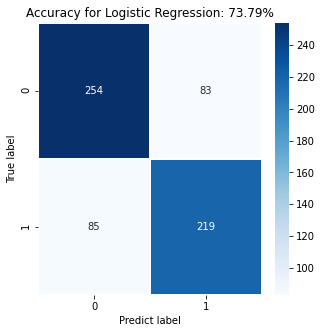

In [ ]:
lr_classifier = linear_model.LogisticRegression(random_state=2020)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix 
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Logistic Regression: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

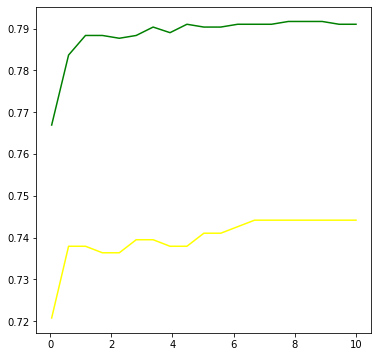

In [ ]:
# optimization
accuracy_score1 = []
accuracy_score2 = []
for i in np.linspace(0.05, 10, 19):
    lr = linear_model.LogisticRegression(penalty="l2", solver = "liblinear", C = i, max_iter=1000)    
    lr = lr.fit(X_train, y_train)
    accuracy_score1.append(accuracy_score(lr.predict(X_train), y_train))
    accuracy_score2.append(accuracy_score(lr.predict(X_test),y_test))
 
graph = [accuracy_score1, accuracy_score2]
color = ["green","yellow"]
label = ["Train","Test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,10, 19),graph[i], color[i], label = label[i])
plt.show()

## from the picture, we can see that c = 8 may be the best value

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


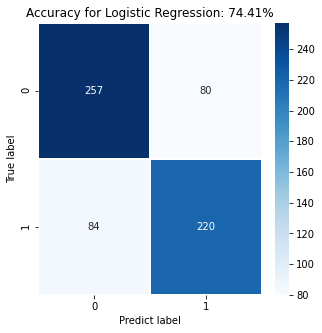

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       337
           1       0.73      0.72      0.73       304

    accuracy                           0.74       641
   macro avg       0.74      0.74      0.74       641
weighted avg       0.74      0.74      0.74       641



In [ ]:
lr_classifier = linear_model.LogisticRegression(C=7,random_state=2020)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Logistic Regression: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()
print(classification_report(y_test,y_pred))

[Text(0, 0, 'P_PSN_33'),
 Text(0, 0, 'P_AGEG_85-99'),
 Text(0, 0, 'C_TRAF_15'),
 Text(0, 0, 'C_WTHR_7'),
 Text(0, 0, 'C_HOUR_01'),
 Text(0, 0, 'P_USER_4'),
 Text(0, 0, 'V_TYPE_17'),
 Text(0, 0, 'C_TRAF_12'),
 Text(0, 0, 'P_SAFE_09'),
 Text(0, 0, 'P_SAFE_01'),
 Text(0, 0, 'C_TRAF_02'),
 Text(0, 0, 'C_RALN_6'),
 Text(0, 0, 'C_RCFG_09'),
 Text(0, 0, 'C_RSUR_8'),
 Text(0, 0, 'P_AGEG_71-84'),
 Text(0, 0, 'V_TYPE_06'),
 Text(0, 0, 'C_HOUR_05'),
 Text(0, 0, 'C_HOUR_00'),
 Text(0, 0, 'C_RSUR_Q'),
 Text(0, 0, 'C_RCFG_05')]

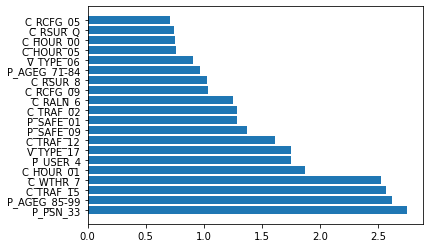

In [ ]:
lr_fea_imp = pd.DataFrame({'col':list(X_train.columns),
                           'imp':lr_classifier.coef_[0]})
lr_fea_imp = lr_fea_imp.sort_values('imp',ascending=False).reset_index(drop=True)
lr_select_fea = lr_fea_imp.iloc[:20,:]
lr_select_col = list(lr_select_fea.col)
# plot feature importance
fig, ax = plt.subplots()
ax.barh(range(len(lr_select_fea)), lr_select_fea.imp)
ax.set_yticks(range(len(lr_select_fea)))
ax.set_yticklabels(lr_select_col)

In [ ]:
# real 1 predicted as 0 is more series

# Decision Tree

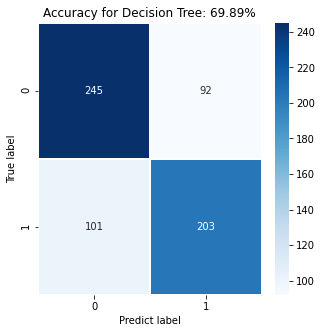

In [ ]:
y = dfc['P_ISEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_ISEV','P_AGE'])]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

# build the model
dt_classifier = tree.DecisionTreeClassifier(random_state=2020)
dt_classifier = dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Decision Tree: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

#print(f'Accuracy for Decision Tree: {accuracy_score(y_test, y_pred)*100:.2f}%')

In [ ]:
#tree.plot_tree(dt_classifier) 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

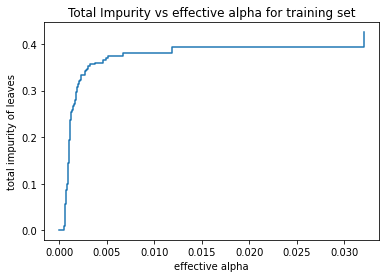

In [ ]:
# return the effective alphas and the corresponding total leaf impurities at each step of the pruning process
clf=dt_classifier
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

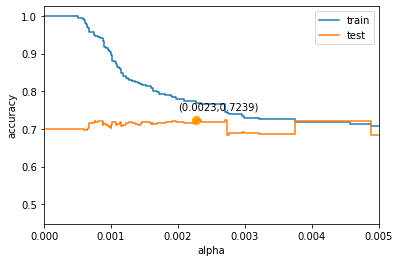

Optimal ccp_alpha for decision tree is: 0.0022626507096226525, with highest accuracy: 72.39%


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=2020, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# find the optimal ccp_alpha value for highest accuracy
max_index = test_scores.index(max(test_scores))
optimal_ccp_alpha = ccp_alphas[max_index]

# plot the accuracy for each ccp_alpha value
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
#ax.set_title("Accuracy vs alpha for training and testing sets")
plt.plot(optimal_ccp_alpha,max(test_scores),marker="o",markersize=8, color="orange")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post")
point = (f"({optimal_ccp_alpha:.4f},{max(test_scores):.4f})")
ax.annotate(point, xytext = (0.002,0.75), xy=(optimal_ccp_alpha,max(test_scores)))
ax.plot(ccp_alphas, test_scores, label="test", drawstyle="steps-post")
ax.legend()
plt.xlim(0,0.005)
plt.show()


print(f"Optimal ccp_alpha for decision tree is: {optimal_ccp_alpha}, with highest accuracy: {max(test_scores)*100:.2f}%")

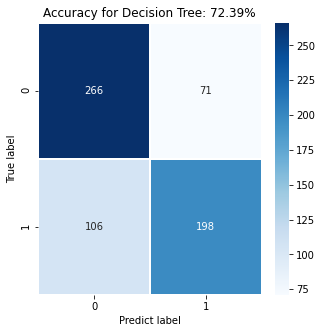

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       337
           1       0.74      0.65      0.69       304

    accuracy                           0.72       641
   macro avg       0.73      0.72      0.72       641
weighted avg       0.73      0.72      0.72       641



In [ ]:
# build the model
dt_classifier = tree.DecisionTreeClassifier(random_state=2020, ccp_alpha=optimal_ccp_alpha)
dt_classifier = dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Decision Tree: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

#print(f'Accuracy for Decision Tree: {accuracy_score(y_test, y_pred)*100:.2f}%')

print(classification_report(y_test,y_pred))

In [ ]:
### generate feature importance through decision tree
def select_dt(imp_num):
  clf = tree.DecisionTreeClassifier(random_state=2020, ccp_alpha=optimal_ccp_alpha)
  clf = clf.fit(X_train, y_train)
  dt_fea_imp = pd.DataFrame({'col':list(X_train.columns),
                             'imp':clf.feature_importances_})
  dt_fea_imp = dt_fea_imp.sort_values('imp',ascending=False).reset_index(drop=True).iloc[:imp_num,:]
  dt_select_col = list(dt_fea_imp.col)
  dt_select_imp = list(dt_fea_imp.imp)

  return dt_select_col, dt_select_imp

imp_num = 20

print(f"Top {imp_num} most important features selected from decision tree:")
print(select_dt(imp_num)[0])

Top 20 most important features selected from decision tree:
['P_SAFE_02', 'C_TRAF_01', 'C_RCFG_01', 'P_AGEG_71-84', 'P_AGEG_85-99', 'P_AGEG_57-70', 'C_RALN_1', 'C_WDAY_2', 'C_WTHR_4', 'P_SEX_M', 'C_HOUR_21', 'C_WDAY_6', 'P_USER_5', 'C_HOUR_15', 'C_TRAF_04', 'C_TRAF_17', 'C_RALN_6', 'V_TYPE_10', 'V_TYPE_09', 'V_TYPE_08']


[Text(0, 0, 'P_SAFE_02'),
 Text(0, 0, 'C_TRAF_01'),
 Text(0, 0, 'C_RCFG_01'),
 Text(0, 0, 'P_AGEG_71-84'),
 Text(0, 0, 'P_AGEG_85-99'),
 Text(0, 0, 'P_AGEG_57-70'),
 Text(0, 0, 'C_RALN_1'),
 Text(0, 0, 'C_WDAY_2'),
 Text(0, 0, 'C_WTHR_4'),
 Text(0, 0, 'P_SEX_M'),
 Text(0, 0, 'C_HOUR_21'),
 Text(0, 0, 'C_WDAY_6'),
 Text(0, 0, 'P_USER_5'),
 Text(0, 0, 'C_HOUR_15'),
 Text(0, 0, 'C_TRAF_04'),
 Text(0, 0, 'C_TRAF_17'),
 Text(0, 0, 'C_RALN_6'),
 Text(0, 0, 'V_TYPE_10'),
 Text(0, 0, 'V_TYPE_09'),
 Text(0, 0, 'V_TYPE_08')]

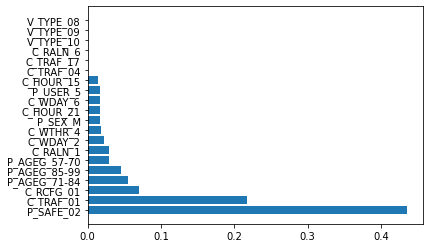

In [ ]:
# plot feature importance
fig, ax = plt.subplots()
ax.barh(range(len(select_dt(imp_num)[0])), select_dt(imp_num)[1])
ax.set_yticks(range(len(select_dt(imp_num)[0])))
ax.set_yticklabels(select_dt(imp_num)[0])

# Random Forest


In [ ]:
y = dfc['P_ISEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_ISEV','P_AGE'])]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

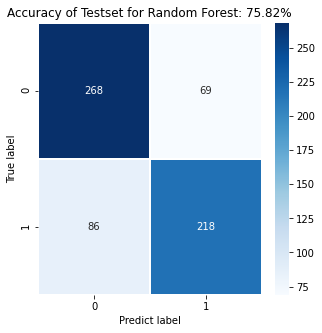

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       337
           1       0.76      0.72      0.74       304

    accuracy                           0.76       641
   macro avg       0.76      0.76      0.76       641
weighted avg       0.76      0.76      0.76       641



In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=2020)
rf.fit(X_train, y_train)
# prediction
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)

# print confusion matrix and accuracy for train and testset
#print(cm_train)
accuracy_train = (cm_train[0,0] + cm_train[1,1]) / sum(sum(cm_train))
#print(f"Accuracy of Trainset for Random Forest: {accuracy_train*100:.2f}%")

cm_test = confusion_matrix(y_test,y_pred)
accuracy_test = (cm_test[0,0] + cm_test[1,1]) / sum(sum(cm_test))
#print(cm_test)
#print(f"Accuracy of Testset for Random Forest: {accuracy_test*100:.2f}%")

# plot confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy of Testset for Random Forest: {accuracy_test*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
### generate feature importance through random forest
def select_rf(imp_num):
  rf = RandomForestClassifier(n_estimators=100,random_state=2020)
  rf = rf.fit(X_train, y_train)
  rf_fea_imp = pd.DataFrame({'col':list(X_train.columns),
                            'imp':rf.feature_importances_})
  rf_fea_imp = rf_fea_imp.sort_values('imp',ascending=False).reset_index(drop=True).iloc[:imp_num,:]
  rf_select_col = list(rf_fea_imp.col)
  rf_select_imp = list(rf_fea_imp.imp)

  return rf_select_col, rf_select_imp

imp_num = 20

print(f"Top {imp_num} most important features selected from random forest:")
print(select_rf(imp_num)[0])

Top 20 most important features selected from random forest:
['P_SAFE_02', 'C_TRAF_18', 'C_TRAF_01', 'P_SAFE_01', 'C_RCFG_02', 'C_RCFG_01', 'C_RALN_1', 'P_AGEG_71-84', 'P_SEX_M', 'P_AGEG_29-42', 'P_AGEG_43-56', 'C_WTHR_1', 'P_SEX_F', 'C_WDAY_6', 'C_RSUR_1', 'P_AGEG_15-28', 'C_WDAY_5', 'P_AGEG_57-70', 'C_WDAY_2', 'C_WDAY_3']


[Text(0, 0, 'P_SAFE_02'),
 Text(0, 0, 'C_TRAF_18'),
 Text(0, 0, 'C_TRAF_01'),
 Text(0, 0, 'P_SAFE_01'),
 Text(0, 0, 'C_RCFG_02'),
 Text(0, 0, 'C_RCFG_01'),
 Text(0, 0, 'C_RALN_1'),
 Text(0, 0, 'P_AGEG_71-84'),
 Text(0, 0, 'P_SEX_M'),
 Text(0, 0, 'P_AGEG_29-42'),
 Text(0, 0, 'P_AGEG_43-56'),
 Text(0, 0, 'C_WTHR_1'),
 Text(0, 0, 'P_SEX_F'),
 Text(0, 0, 'C_WDAY_6'),
 Text(0, 0, 'C_RSUR_1'),
 Text(0, 0, 'P_AGEG_15-28'),
 Text(0, 0, 'C_WDAY_5'),
 Text(0, 0, 'P_AGEG_57-70'),
 Text(0, 0, 'C_WDAY_2'),
 Text(0, 0, 'C_WDAY_3')]

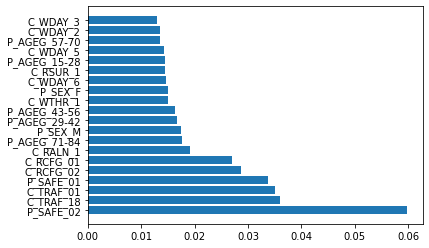

In [ ]:
# plot feature importance
fig, ax = plt.subplots()
ax.barh(range(len(select_rf(imp_num)[0])), select_rf(imp_num)[1])
ax.set_yticks(range(len(select_rf(imp_num)[0])))
ax.set_yticklabels(select_rf(imp_num)[0])

# XGBoost

In [ ]:
y = dfc['P_ISEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_ISEV','P_AGE'])]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

Accuracy of Trainset for XGBoost: 80.24%
Accuracy of Testset for XGBoost: 74.26%


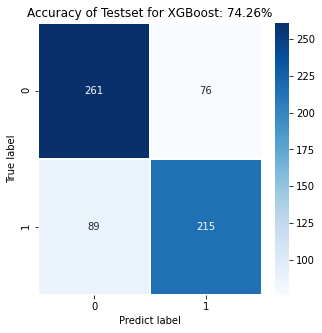

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       337
           1       0.74      0.71      0.72       304

    accuracy                           0.74       641
   macro avg       0.74      0.74      0.74       641
weighted avg       0.74      0.74      0.74       641



In [ ]:
xgb = XGBClassifier(n_estimators=100,random_state=2020)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
cm_train = confusion_matrix(y_train,y_pred_train)
#print(cm_train)
acc = (cm_train[0,0] + cm_train[1,1]) / sum(sum(cm_train))
print(f"Accuracy of Trainset for XGBoost: {acc*100:.2f}%")
    
y_pred = xgb.predict(X_test)
cm_pred = confusion_matrix(y_test,y_pred)
acc_pred = (cm_pred[0,0] + cm_pred[1,1]) / sum(sum(cm_pred))
#print(cm_test)
print(f"Accuracy of Testset for XGBoost: {acc_pred*100:.2f}%")

# plot confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(xgb_cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy of Testset for XGBoost: {acc_pred*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
### generate feature importance through XGBoost
def select_xgb(imp_num):
  xgb = RandomForestClassifier(n_estimators=100,random_state=2020)
  xgb.fit(X_train, y_train)
  xgb_fea_imp = pd.DataFrame({'col':list(X_train.columns),
                              'imp':xgb.feature_importances_})
  xgb_fea_imp = xgb_fea_imp.sort_values('imp',ascending=False).reset_index(drop=True).iloc[:imp_num,:]
  xgb_select_col = list(xgb_fea_imp.col)
  xgb_select_imp = list(xgb_fea_imp.imp)

  return xgb_select_col, xgb_select_imp

imp_num = 20

print(f"Top {imp_num} most important features selected from XGBoost:")
print(select_xgb(imp_num)[0])

Top 20 most important features selected from XGBoost:
['P_SAFE_02', 'C_TRAF_18', 'C_TRAF_01', 'P_SAFE_01', 'C_RCFG_02', 'C_RCFG_01', 'C_RALN_1', 'P_AGEG_71-84', 'P_SEX_M', 'P_AGEG_29-42', 'P_AGEG_43-56', 'C_WTHR_1', 'P_SEX_F', 'C_WDAY_6', 'C_RSUR_1', 'P_AGEG_15-28', 'C_WDAY_5', 'P_AGEG_57-70', 'C_WDAY_2', 'C_WDAY_3']


[Text(0, 0, 'P_SAFE_02'),
 Text(0, 0, 'C_TRAF_18'),
 Text(0, 0, 'C_TRAF_01'),
 Text(0, 0, 'P_SAFE_01'),
 Text(0, 0, 'C_RCFG_02'),
 Text(0, 0, 'C_RCFG_01'),
 Text(0, 0, 'C_RALN_1'),
 Text(0, 0, 'P_AGEG_71-84'),
 Text(0, 0, 'P_SEX_M'),
 Text(0, 0, 'P_AGEG_29-42'),
 Text(0, 0, 'P_AGEG_43-56'),
 Text(0, 0, 'C_WTHR_1'),
 Text(0, 0, 'P_SEX_F'),
 Text(0, 0, 'C_WDAY_6'),
 Text(0, 0, 'C_RSUR_1'),
 Text(0, 0, 'P_AGEG_15-28'),
 Text(0, 0, 'C_WDAY_5'),
 Text(0, 0, 'P_AGEG_57-70'),
 Text(0, 0, 'C_WDAY_2'),
 Text(0, 0, 'C_WDAY_3')]

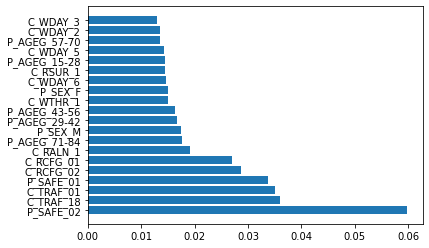

In [ ]:
# plot feature importance
fig, ax = plt.subplots()
ax.barh(range(len(select_xgb(imp_num)[0])), select_xgb(imp_num)[1])
ax.set_yticks(range(len(select_xgb(imp_num)[0])))
ax.set_yticklabels(select_xgb(imp_num)[0])

# Neural Network

In [ ]:
# create model
# use one hidden layer with 10 neurons
# set dependent and independent variables
y = dfc['P_ISEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_ISEV','P_AGE'])]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)
model = Sequential()
model.add(Dense(10, input_dim=142, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

Epoch 1/100
1493/1493 [==============================] - 1s 965us/step - loss: 0.7044 - accuracy: 0.4977
Epoch 2/100
1493/1493 [==============================] - 1s 956us/step - loss: 0.6730 - accuracy: 0.6021
Epoch 3/100
1493/1493 [==============================] - 1s 942us/step - loss: 0.6388 - accuracy: 0.6363
Epoch 4/100
1493/1493 [==============================] - 1s 945us/step - loss: 0.6033 - accuracy: 0.6912
Epoch 5/100
1493/1493 [==============================] - 1s 952us/step - loss: 0.6081 - accuracy: 0.6678
Epoch 6/100
1493/1493 [==============================] - 1s 968us/step - loss: 0.5930 - accuracy: 0.6986
Epoch 7/100
1493/1493 [==============================] - 1s 972us/step - loss: 0.5806 - accuracy: 0.6892
Epoch 8/100
1493/1493 [==============================] - 1s 963us/step - loss: 0.5668 - accuracy: 0.7187
Epoch 9/100
1493/1493 [==============================] - 1s 967us/step - loss: 0.5568 - accuracy: 0.7254
Epoch 10/100
1493/1493 [==============================]

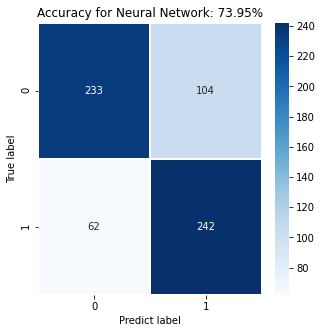

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
# set different values from epochs and batch_size to see the changes in accuracy
model.fit(X_train, y_train, epochs=100, batch_size=1)
# evaluate the model
scores = model.evaluate(X_test, y_test)
print(scores)
print("Keras: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred = (predictions > 0.38)
y_pred=y_pred*1 #convert to 0,1 instead of True False
matrix = confusion_matrix(y_test, y_pred)
#print(matrix)

# plot confustion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Neural Network: {scores[1]*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()



In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       337
           1       0.70      0.80      0.74       304

    accuracy                           0.74       641
   macro avg       0.74      0.74      0.74       641
weighted avg       0.75      0.74      0.74       641



# Conclusion